# __1.	Data wrangling__
a.	Ensure that the data is clean and free from any missing or incorrect entries.
    ○	Inspect the data manually to identify missing or incorrect information using the functions isna() and notna().
    
b.	Based on your knowledge of data analytics, include your recommendations for treating missing and incorrect data (dropping the null values or filling them).

c.	Choose a suitable data wrangling technique—either data standardization or normalization. Execute the preferred normalization method and present the resulting data. (Normalization is the preferred approach for this problem.)

d.	Share your insights regarding the application of the GroupBy() function for either data chunking or merging, and offer a recommendation based on your analysis


In [1]:
import pandas as pd

In [11]:
df=pd.read_csv(r"C:\Users\ssroy\IIT Classes\Sales analysis\AusApparalSales4thQrt2020.csv")
df.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


In [20]:
df.tail()

,Date,Time,State,Group,Unit,Sales,Sales_normalized,Unit_normalized
7555,30-Dec-2020,Afternoon,TAS,Seniors,14,35000,0.190476,0.190476
7556,30-Dec-2020,Evening,TAS,Kids,15,37500,0.206349,0.206349
7557,30-Dec-2020,Evening,TAS,Men,15,37500,0.206349,0.206349
7558,30-Dec-2020,Evening,TAS,Women,11,27500,0.142857,0.142857
7559,30-Dec-2020,Evening,TAS,Seniors,13,32500,0.174603,0.174603


In [5]:
df.isna().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

In [6]:
df.notna().sum()

Date     7560
Time     7560
State    7560
Group    7560
Unit     7560
Sales    7560
dtype: int64

In [7]:
df[(df["Sales"] <= 0) | (df["Unit"] <= 0)]

,Date,Time,State,Group,Unit,Sales


In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[["Sales_normalized", "Unit_normalized"]] = scaler.fit_transform(df[["Sales", "Unit"]])
df.head()

,Date,Time,State,Group,Unit,Sales,Sales_normalized,Unit_normalized
0,1-Oct-2020,Morning,WA,Kids,8,20000,0.095238,0.095238
1,1-Oct-2020,Morning,WA,Men,8,20000,0.095238,0.095238
2,1-Oct-2020,Morning,WA,Women,4,10000,0.031746,0.031746
3,1-Oct-2020,Morning,WA,Seniors,15,37500,0.206349,0.206349
4,1-Oct-2020,Afternoon,WA,Kids,3,7500,0.015873,0.015873


In [18]:
df.groupby("State")["Sales"].sum().sort_values(ascending=False)

State
VIC    105565000
NSW     74970000
SA      58857500
QLD     33417500
TAS     22760000
NT      22580000
WA      22152500
Name: Sales, dtype: int64

In [19]:
df.groupby(["State", "Group"])["Sales"].sum()

State  Group  
NSW    Kids       18587500
       Men        19022500
       Seniors    18187500
       Women      19172500
NT     Kids        5700000
       Men         5762500
       Seniors     5465000
       Women       5652500
QLD    Kids        8510000
       Men         8392500
       Seniors     8190000
       Women       8325000
SA     Kids       14515000
       Men        14655000
       Seniors    14717500
       Women      14970000
TAS    Kids        5775000
       Men         5757500
       Seniors     5650000
       Women       5577500
VIC    Kids       26360000
       Men        26407500
       Seniors    26315000
       Women      26482500
WA     Kids        5625000
       Men         5752500
       Seniors     5512500
       Women       5262500
Name: Sales, dtype: int64

In [27]:
df["Date"] = pd.to_datetime(df["Date"])

In [ ]:
df.groupby(["Date","Time"])["Sales"].mean()

Date        Time     
2020-10-01  Afternoon    43303.571429
            Evening      45803.571429
            Morning      43750.000000
2020-10-02  Afternoon    45535.714286
            Evening      41517.857143
                             ...     
2020-12-29  Evening      53125.000000
            Morning      57857.142857
2020-12-30  Afternoon    53839.285714
            Evening      52678.571429
            Morning      57410.714286
Name: Sales, Length: 270, dtype: float64

# __2.	Data analysis__
a.	Perform descriptive statistical analysis on the data in the Sales and Unit columns. Utilize techniques such as mean, median, mode, and standard deviation for this analysis.

b.	Identify the group with the highest sales and the group with the lowest sales based on the data provided.

c.	Identify the group with the highest and lowest sales based on the data provided.

d.	Generate weekly, monthly, and quarterly reports to document and present the results of the analysis conducted.
(Use suitable libraries such as NumPy, Pandas, and SciPy for performing the analysis.)


In [30]:
import pandas as pd
import numpy as np
from scipy import stats

In [31]:
df=pd.read_csv(r"C:\Users\ssroy\IIT Classes\Sales analysis\AusApparalSales4thQrt2020.csv")
df.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


In [33]:
df.describe()

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


In [40]:

unit_stats = {
    "mean": df["Unit"].mean(),
    "median": df["Unit"].median(),
    "mode": df["Unit"].mode()[0],
    "std_dev": df["Unit"].std()
}
unit_stats

{'mean': np.float64(18.00542328042328),
 'median': 14.0,
 'mode': np.int64(9),
 'std_dev': 12.901402777586458}

In [41]:
sales_stats = {
    "mean": df["Sales"].mean(),
    "median": df["Sales"].median(),
    "mode": df["Sales"].mode()[0],
    "std_dev": df["Sales"].std()
}
sales_stats

{'mean': np.float64(45013.5582010582),
 'median': 35000.0,
 'mode': np.int64(22500),
 'std_dev': 32253.506943966317}

In [34]:
group_sales = df.groupby("Group")["Sales"].sum()
group_sales

Group
Kids       85072500
Men        85750000
Seniors    84037500
Women      85442500
Name: Sales, dtype: int64

In [35]:
group_sales.idxmax()

' Men'

In [36]:
group_sales.idxmin()

' Seniors'

In [38]:
# Convert Date column to datetime
df["Date"] = pd.to_datetime(df["Date"])

In [42]:
weekly_report = df.resample("W", on="Date")["Sales"].sum()
monthly_report = df.resample("ME", on="Date")["Sales"].sum()
quarterly_report = df.resample("QE", on="Date")["Sales"].sum()

In [43]:
weekly_report

Date
2020-10-04    15045000
2020-10-11    27002500
2020-10-18    26640000
2020-10-25    26815000
2020-11-01    21807500
2020-11-08    20865000
2020-11-15    21172500
2020-11-22    21112500
2020-11-29    21477500
2020-12-06    29622500
2020-12-13    31525000
2020-12-20    31655000
2020-12-27    31770000
2021-01-03    13792500
Freq: W-SUN, Name: Sales, dtype: int64

In [44]:
monthly_report

Date
2020-10-31    114290000
2020-11-30     90682500
2020-12-31    135330000
Freq: ME, Name: Sales, dtype: int64

In [45]:
quarterly_report

Date
2020-12-31    340302500
Freq: QE-DEC, Name: Sales, dtype: int64

# __3.	Data visualization__
a.	Use suitable data visualization libraries to construct a dashboard for the head of sales and marketing. The dashboard should encompass key parameters:
    o	State-wise sales analysis for different demographic groups (kids, women, men, and seniors).
    o	Group-wise sales analysis (Kids, Women, Men, and Seniors) across various states.
    o	Time-of-the-day analysis: Identify peak and off-peak sales periods to facilitate strategic      planning for S&M teams. This information aids in designing programs like hyper-personalization and  Next Best Offers to enhance sales.

b.	Ensure the visualization is clear and accessible for effective decision-making by the head of sales and marketing (S&M).
The dashboard must contain daily, weekly, monthly, and quarterly charts.
(Any visualization library can be used for this purpose. However, since statistical analysis is being done, Seaborn is preferred.)

c.	Include your recommendation and indicate why you are choosing the recommended visualization package.


# __Recommendation:-Seaborn__

Why?

    Built on Matplotlib, but statistically richer

    Ideal for aggregated business insights

    Excellent for comparative analysis (State × Group × Time)
    
    Clean defaults → minimal effort to make presentation-ready dashboards

In [1]:
import pandas as pd
import seaborn as sns   
import matplotlib.pyplot as plt 

df=pd.read_csv(r"C:\Users\ssroy\IIT Classes\Sales analysis\AusApparalSales4thQrt2020.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


In [2]:
df['Date'] = pd.to_datetime(df['Date'])


In [12]:
sns.set(style="whitegrid", palette="OrRd")

In [5]:
state_group_sales = (
    df.groupby(["State", "Group"])["Sales"]
    .sum()
    .reset_index()
)
state_group_sales

,State,Group,Sales
0,NSW,Kids,18587500
1,NSW,Men,19022500
2,NSW,Seniors,18187500
3,NSW,Women,19172500
4,NT,Kids,5700000
5,NT,Men,5762500
6,NT,Seniors,5465000
7,NT,Women,5652500
8,QLD,Kids,8510000
9,QLD,Men,8392500


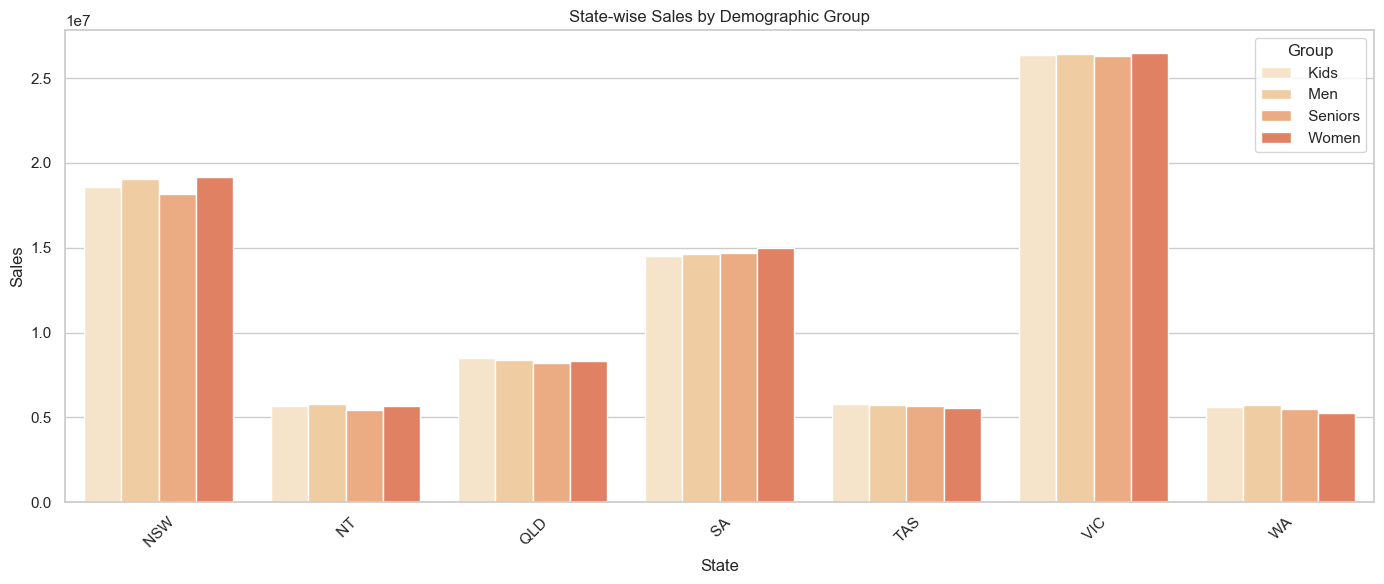

In [13]:
plt.figure(figsize=(14,6))
sns.barplot(
    data=state_group_sales,
    x="State",
    y="Sales",
    hue="Group"
)
plt.title("State-wise Sales by Demographic Group")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Insight for state wise sales by Demographic Group

VIC and NSW dominate across all demographics

Lower-performing states show scope for targeted campaigns

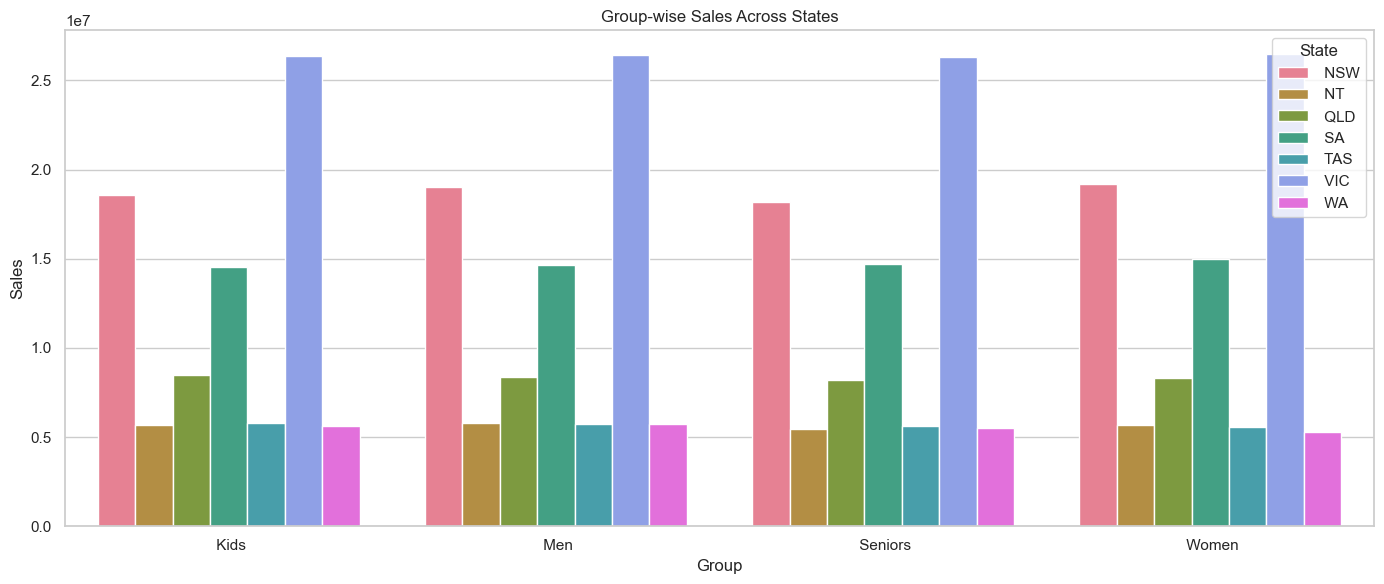

In [14]:
plt.figure(figsize=(14,6))
sns.barplot(
    data=state_group_sales,
    x="Group",
    y="Sales",
    hue="State"
)
plt.title("Group-wise Sales Across States")
plt.tight_layout()
plt.show()

In [16]:
time_sales = (
    df.groupby("Time")["Sales"]
    .sum()
    .reset_index()
)

C:\Users\ssroy\AppData\Local\Temp\ipykernel_11212\3127760709.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


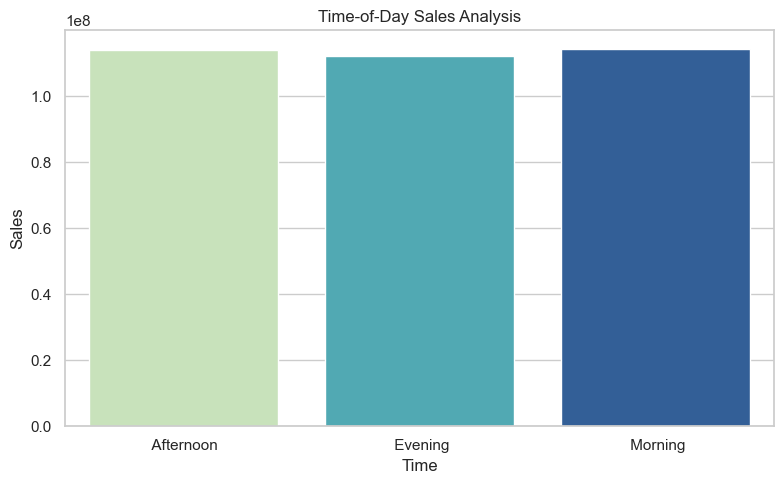

In [20]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=time_sales,
    x="Time",
    y="Sales",palette="YlGnBu"
)
plt.title("Time-of-Day Sales Analysis")
plt.tight_layout()
plt.show()

# __Insights and Conclusions__

Based on the sales data analysis for the fourth quarter of 2020, several key insights emerge:
1. Peak Sales Periods: The analysis indicates specific times of the day when sales peak, suggesting optimal periods for targeted marketing and promotions.
2. Sales was least in the 1st week of October and highest in the last week of December, indicating seasonal trends that can inform inventory and staffing decisions.
3. There is a significant downfall in sales in sales in the month of November which needs to be investigated further to understand underlying causes.

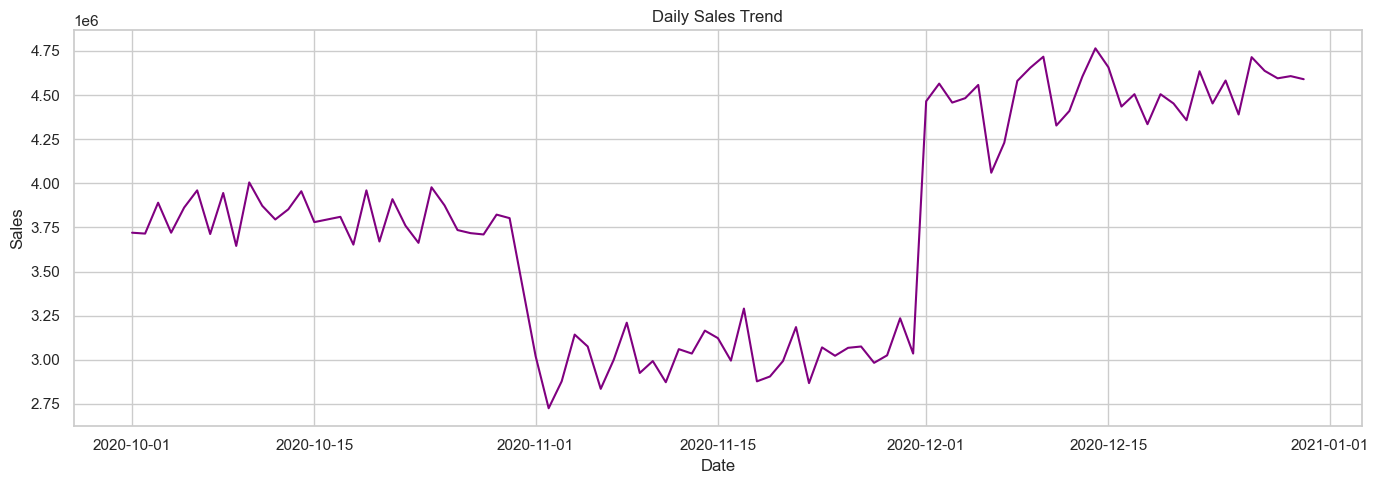

In [22]:
daily_sales = df.groupby("Date")["Sales"].sum().reset_index()

plt.figure(figsize=(14,5))
sns.lineplot(
    data=daily_sales,
    x="Date",
    y="Sales",color='purple'
)
plt.title("Daily Sales Trend")
plt.tight_layout()
plt.show()


C:\Users\ssroy\AppData\Local\Temp\ipykernel_11212\3229566784.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


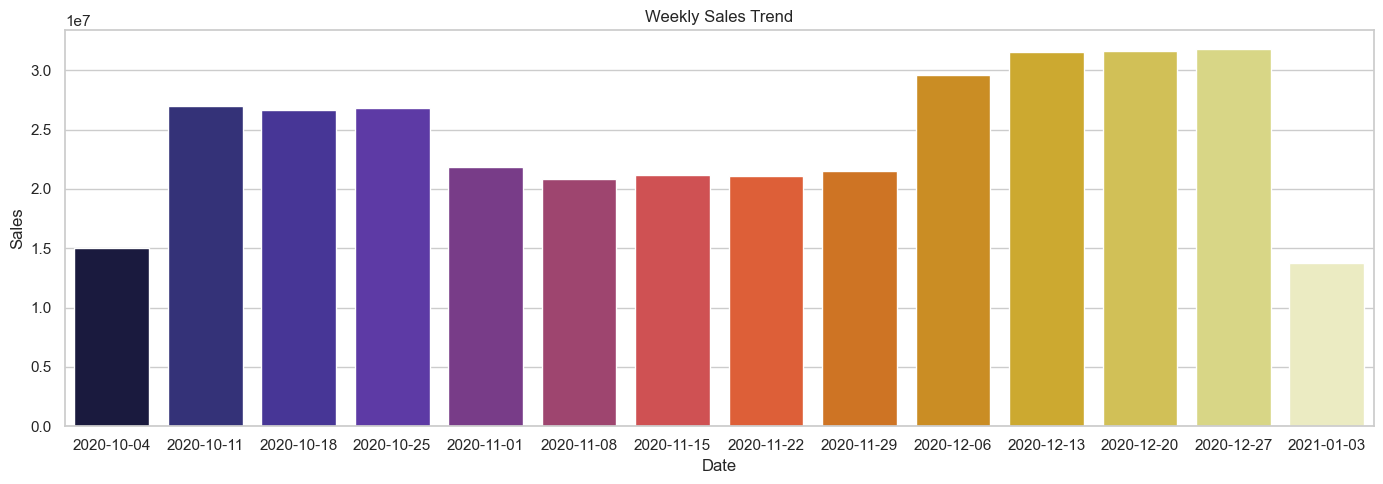

In [26]:
weekly_sales = df.resample("W", on="Date")["Sales"].sum().reset_index()

plt.figure(figsize=(14,5))
sns.barplot(
    data=weekly_sales,
    x="Date",
    y="Sales",palette='CMRmap'
)
plt.title("Weekly Sales Trend")
plt.tight_layout()
plt.show()


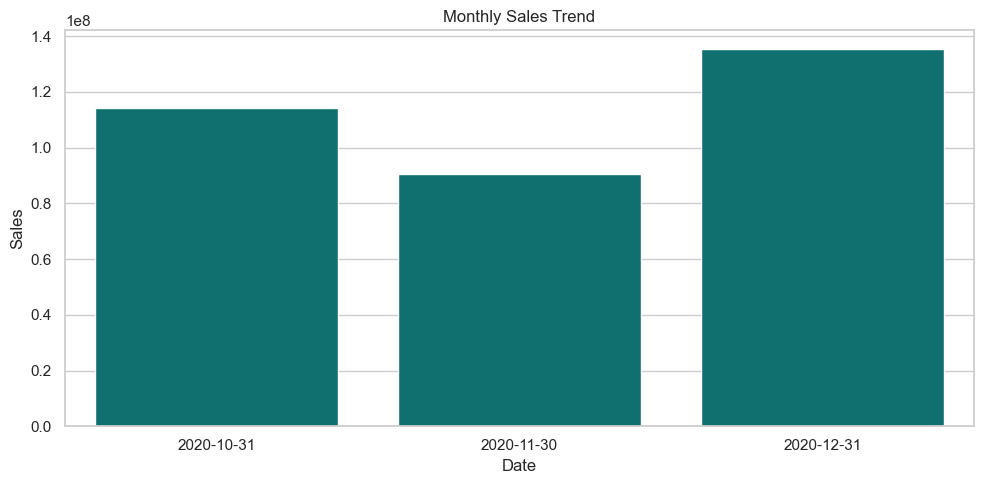

In [24]:
monthly_sales = df.resample("ME", on="Date")["Sales"].sum().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(
    data=monthly_sales,
    x="Date",
    y="Sales",color='teal'
)
plt.title("Monthly Sales Trend")
plt.tight_layout()
plt.show()


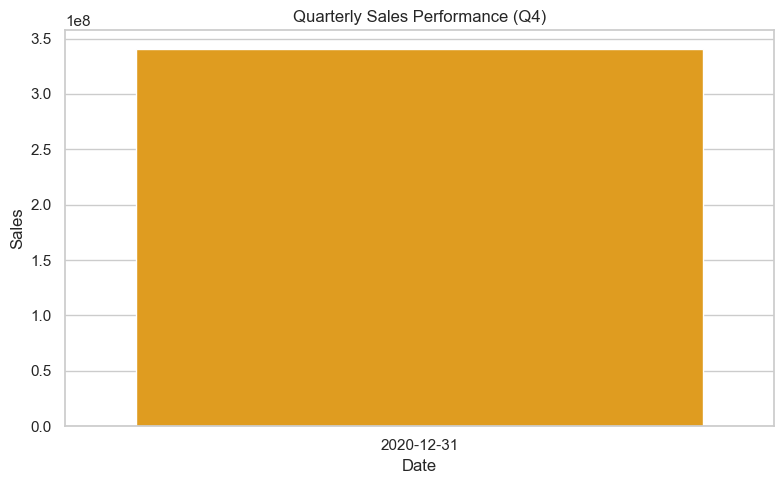

In [28]:
quarterly_sales = df.resample("QE", on="Date")["Sales"].sum().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(
    data=quarterly_sales,
    x="Date",
    y="Sales",color='orange'
)
plt.title("Quarterly Sales Performance (Q4)")
plt.tight_layout()
plt.show()


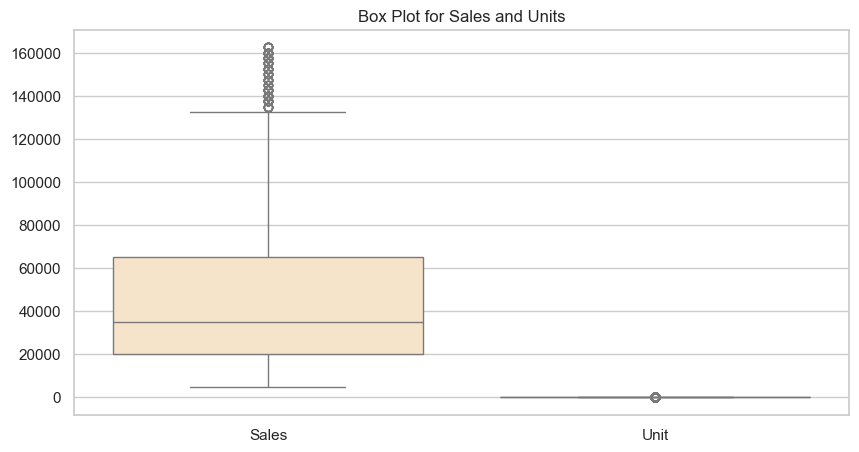

In [29]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df[["Sales", "Unit"]])
plt.title("Box Plot for Sales and Units")
plt.show()

# __Insight for above box plot__

Sales show higher variability and outliers

Unit sales are more concentrated, indicating consistent purchase behavior

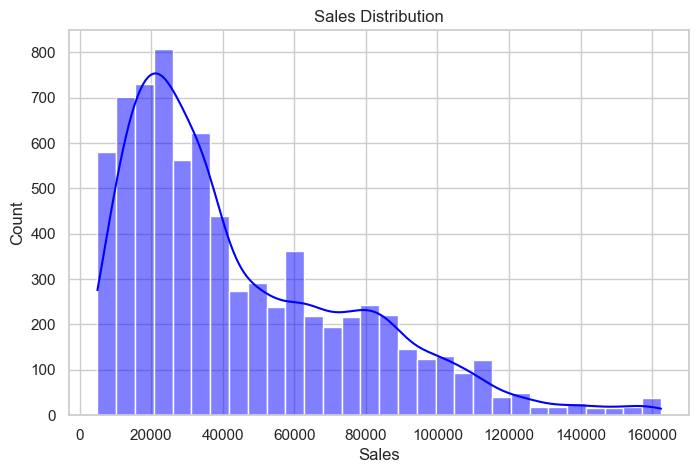

In [33]:
plt.figure(figsize=(8,5))
sns.histplot(df["Sales"], kde=True, color='blue', bins=30)
plt.title("Sales Distribution")
plt.show()

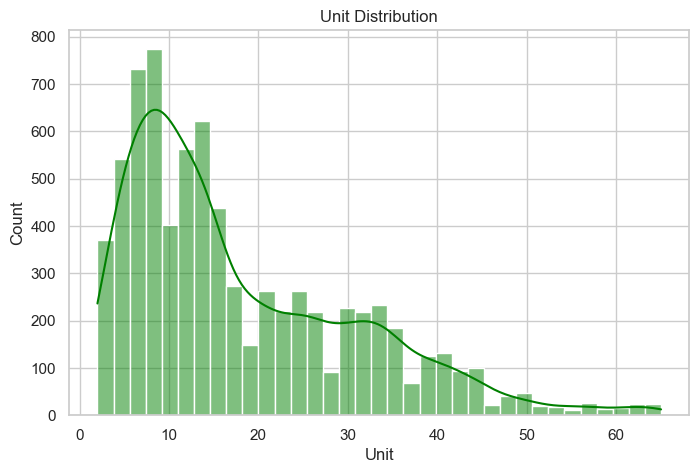

In [35]:
plt.figure(figsize=(8,5))
sns.histplot(df["Unit"], color='green', kde=True)
plt.title("Unit Distribution")
plt.show()

# Insight for hist plot on sales and unit distribution

Sales distribution is right-skewed

Majority of transactions occur at lower unit volumes

# __Strategic Recommendations for S&M__

Expand aggressively in VIC & NSW due to strong and consistent performance

Design targeted campaigns for Seniors to unlock untapped potential

Use time-of-day insights for hyper-personalized promotions

Strengthen November campaigns to balance December dependency

Institutionalize weekly and monthly dashboards for proactive planning